# Predicting Type 2 Diabetes 🩺💉

In this notebook, we use the Pima Indians Diabetes Dataset to:

1. Perform EDA and data preprocessing  
2. Train & evaluate Decision Tree and Random Forest classifiers  
3. Compare model performance using accuracy, confusion matrix & classification report

Let's dive in! 🚀

#### 📦 Let's begin by importing the required libraries.

In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#### 📂 Then, we load the dataset into a DataFrame so we can explore and clean it.

In [2]:
data = pd.read_csv('diabetes-dataset.csv')

## 🔍 Display top 10 and last 10 rows of the dataset
We display the first and last 10 rows of the dataset to ensure everything is loaded correctly and to get a quick look at the data. 

In [3]:
# Historically, women in Pime tribe have had higher pregnancy rates. Note that the `Pregnancies` column refers to the number of times a woman has been pregnant, which may include miscarriages or pregnancies that did not result in birth.
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,627.000,50,1
1,1,85,66,29,0,26.6,351.000,31,0
2,8,183,64,0,0,23.3,672.000,32,1
3,1,89,66,23,94,28.1,167.000,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,201.000,30,0
6,3,78,50,32,88,31.0,248.000,26,1
7,10,115,0,0,0,35.3,134.000,29,0
8,2,197,70,45,543,30.5,158.000,53,1
9,8,125,96,0,0,0.0,232.000,54,1


In [4]:
data.tail(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
758,1,106,76,0,0,37.5,197.00,26,0
759,6,190,92,0,0,35.5,278.00,66,1
760,2,88,58,26,16,28.4,766.00,22,0
761,9,170,74,31,0,44.0,403.00,43,1
762,9,89,62,0,0,22.5,142.00,33,0
763,10,101,76,48,180,32.9,171.00,63,0
764,2,122,70,27,0,36.8,0.34,27,0
765,5,121,72,23,112,26.2,245.00,30,0
766,1,126,60,0,0,30.1,349.00,47,1
767,1,93,70,31,0,30.4,315.00,23,0


## 📂 Information about the dataset
We want to get information about our dataset, like total number of rows, total number of columns, datatypes of each column and memory requirement. 

In [5]:
data.info() # Displays data types and non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Now, we display summary statistics for each feature to analyze their distribution, central tendency, and dispersion. This step provides essential insights for potential data preprocessing and feature engineering. 

For this, we will use describe method of pandas dataframe. 

In [6]:
data.describe()
# Example: For the "BloodPressure" column, 25% values are below 64 and 50% values are below 72. 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,347.079349,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,254.431659,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,165.000000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,295.500000,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,527.250000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,997.000000,81.000000,1.000000


### 🔥 Correlation Heatmap

This heatmap provides a visual representation of how each feature in the dataset is correlated with the others, especially the `Outcome` (i.e., whether or not someone has diabetes).

- Each square represents the correlation between two variables.
- Values range from **-1 to 1**:
  - **1** means a strong positive correlation (as one increases, so does the other)
  - **-1** means a strong negative correlation (as one increases, the other decreases)
  - **0** means no correlation

The color gradient (`coolwarm`) makes it easy to spot strong relationships:  
🎨 **Dark red = strong positive correlation**  
🎨 **Dark blue = strong negative correlation**

For example, we can clearly see that **Glucose** has a strong positive correlation with `Outcome`, meaning that higher glucose levels are often associated with a diabetes diagnosis.

💡 **Why it matters:**  
This helps us understand which features might be more predictive and worth focusing on in our model.


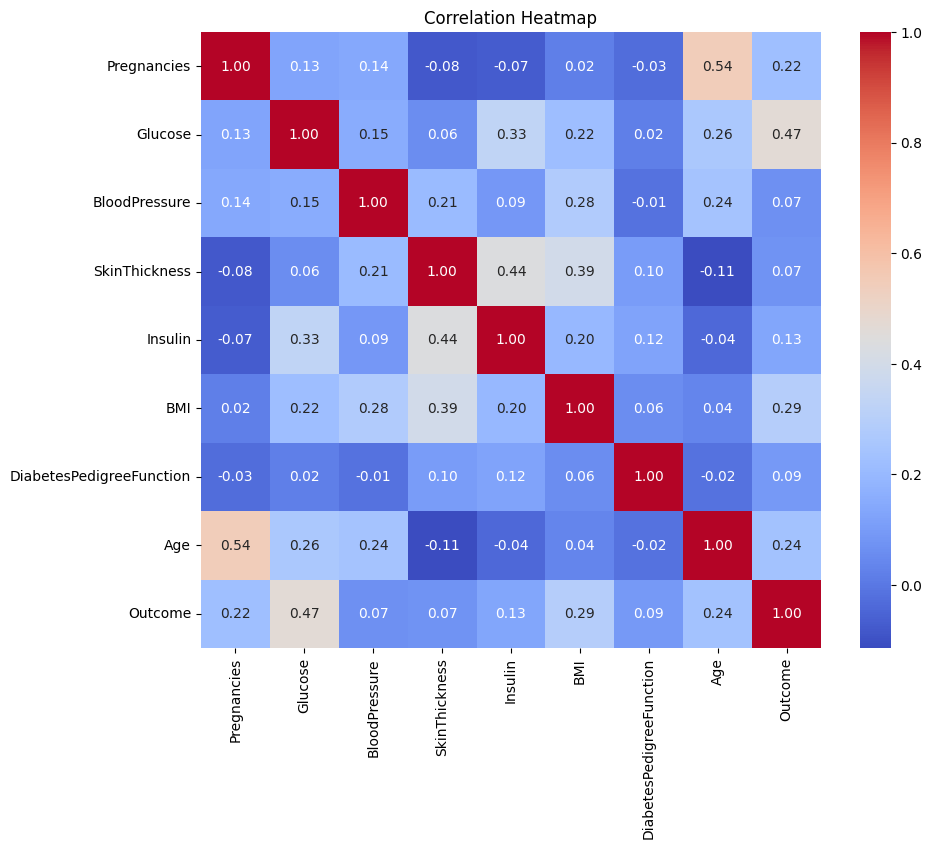

In [7]:
plt.figure(figsize=(10, 8))  # Set the size of the heatmap
sns.heatmap(data.corr(),     # Calculate correlations between all numeric columns in the dataset
            annot=True,      # Show the correlation values on the heatmap
            cmap='coolwarm', # Use a color map that ranges from cool (blue) to warm (red)
            fmt='.2f')       # Format the numbers to 2 decimal places

plt.title('Correlation Heatmap')  # Add a title for clarity
plt.show()  # Display the heatmap

#### 🔍 What do we notice?

- **Glucose** has the **strongest link with diabetes** (`0.47`). So, higher glucose levels are often found in people with diabetes.
- **BMI** (`0.31`) and **Age** (`0.24`) also show some connection with the diabetes outcome.
- Features like **Blood Pressure** or **Skin Thickness** don’t seem strongly related to diabetes.
- **Pregnancies** and **Age** are also quite related – older people tend to have had more pregnancies.
- The diagonal values of `1.00` represent a perfect correlation of a variable with itself (e.g. `Pregnancies` with `Pregnancies`). This is normal and does not provide insight for prediction.


#### ✅ Why it matters:

This view helps us spot which features might be more useful when building a machine learning model to predict diabetes.

### 📊 Glucose Levels by Outcome – Boxplot

As we can see, people with diabetes tend to have **higher glucose levels**, and the distribution is clearly shifted compared to those without diabetes.

This boxplot compares glucose levels between two groups:
- Individuals **without diabetes** (`Outcome = 0`)
- Individuals **with diabetes** (`Outcome = 1`)


🧠 **Why it matters:**  
This tells us that glucose is likely an important feature for predicting diabetes, which can be very useful when training our machine learning model.

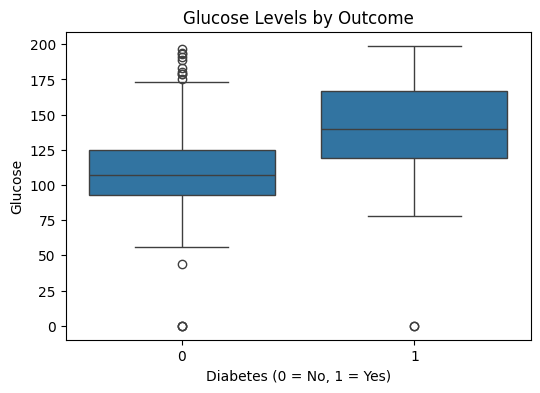

In [8]:
# Creating a boxplot to compare glucose levels between individuals with and without diabetes
# This helps us visually understand if glucose is an important factor for predicting diabetes

plt.figure(figsize=(6, 4))  # Set the figure size for better readability
sns.boxplot(x='Outcome',    # The outcome variable (0 = no diabetes, 1 = diabetes) on the x-axis
            y='Glucose',    # The glucose values we want to compare across outcomes
            data=data)      # The dataset we're using

# Add titles and labels to make the plot more understandable
plt.title('Glucose Levels by Outcome')      
plt.xlabel('Diabetes (0 = No, 1 = Yes)')   
plt.ylabel('Glucose')                       
plt.show()

#### 🧪 Results

- Median glucose: **~130 mg/dL** for diabetics vs **~105 mg/dL** for non-diabetics.
- IQR (Interquartile Range – range of the middle 50% of values) for diabetics: **~115–165 mg/dL** and **~95–125 mg/dL** for non-diabetics.
- **One low outlier** (~0 mg/dL) appears in the diabetic group.
- **Several outliers** in the non-diabetic group, mostly **above 175 mg/dL** and some very low.
- Overall, diabetics tend to have **higher and more consistent** glucose levels.


🧠 **Insight**:  
This visualization supports the idea that **glucose level is an important indicator** for diabetes. It highlights how the distribution shifts between the two groups, which is helpful when selecting features for a machine learning model.

## 🧹 Data cleaning - check for missing values 

It's important to detect missing values in the dataset to ensure no data is lost or misrepresented during model training.

From the results, we can tell that we don't have any null value in our dataset!

In [9]:
data.isnull() # Return a DataFrame indicating missing values (True for NaNs, False otherwise)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [10]:
data.isnull().sum() # We confirm that there are no missing values

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Even though there are no missing values in our dataset, some features such as **Glucose**, **BloodPressure**, **Insulin**, **SkinThickness**, **Insulin** and **BMI** contain zero values (these columns had 0 as their minimum value). In a real-world medical context, a value of zero for these features is not realistic and likely indicates missing or unrecorded data.

To handle this properly, we will first replace all zero values in these specific columns with **NaN** (Not a Number). This will allow us to treat them as missing values and handle them accordingly—by either replacing them with the mean or median of the respective column.

This step ensures our model is trained on more realistic data and helps improve its overall performance.

In [11]:
# Create a full, independent copy of the dataset with deep=True, meaning changes to the copy won't affect the original data
data_copy = data.copy(deep=True)

In [12]:
# Display the column names of the original (first) dataset
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

We select only the columns `Glucose`, `BloodPressure`, `SkinThickness`, `Insulin`, and `BMI` because in the `data.describe()` output, these columns had 0 as their minimum value. In a real-world medical dataset, zero is not a valid measurement for these features and likely represents missing or unrecorded data. Therefore, we replace those zero values with `NaN` so we can handle them appropriately in the data cleaning process.

In [13]:
# Columns with 0 as min in data.describe(), likely indicating missing values
data_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']]

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
0,148,72,35,0,33.6
1,85,66,29,0,26.6
2,183,64,0,0,23.3
3,89,66,23,94,28.1
4,137,40,35,168,43.1
...,...,...,...,...,...
763,101,76,48,180,32.9
764,122,70,27,0,36.8
765,121,72,23,112,26.2
766,126,60,0,0,30.1


In [14]:
# Replace zero values with NaN in specific columns where zero is not a valid measurement
data_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI']] = data_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI']].replace(0,np.nan)

In [15]:
# Display summary statistics after replacing invalid zeros with NaN
# NaNs are ignored by describe(), so we now see more accurate statistics
data_copy.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,347.079349,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,254.431659,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.100000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,165.000000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,295.500000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,527.250000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,997.000000,81.000000,1.000000


In [16]:
# Check for missing values (now represented as NaN) in the dataset after replacing zeros
data_copy.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,True,False,False,False,False
1,False,False,False,False,True,False,False,False,False
2,False,False,False,True,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,True,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,True,True,False,False,False,False


In [17]:
# Count the total number of missing values (NaN) per column after replacing zeros with NaN
# This helps verify that there are no missing values left in the dataset
data_copy.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

To handle missing values (NaN), we replace them with the **mean** of each respective column. 

In this step, we replace the zero values in specific columns (such as **Glucose**, **BloodPressure**, **SkinThickness**, **Insulin**, and **BMI**) with the mean value of each respective column. This ensures that zero values, which are not valid in a medical context, are replaced with more realistic values for further analysis.


In [18]:
data['Glucose'] = data['Glucose'].replace(0,data['Glucose'].mean())
data['BloodPressure'] = data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['SkinThickness'] = data['SkinThickness'].replace(0,data['SkinThickness'].mean())
data['Insulin'] = data['Insulin'].replace(0,data['Insulin'].mean())
data['BMI'] = data['BMI'].replace(0,data['BMI'].mean())

In [19]:
# Check if any zero values remain and ensure replacement was done correctly
# This will show the count of missing values (NaN) in each column, confirming that no zero values are left
data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].isnull().sum()

Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64

No missing values (NaN) left in the selected columns, indicating that the replacement was successful. All zero values have been replaced with the respective column **mean**.

Having completed the **data cleaning** process, we now move on to the next step: defining our features and outcome variable in order to prepare the data for model training.

## 🎯 Define features and outcome

In order to build a machine learning model, we need to separate our dataset into two parts:

- **The features (`X`)**: These are the input variables that the model will use to make predictions.  
  In this case, these are all the columns *except* the outcome — the independent variables.

- **The target labels (`y`)**: This is the output variable (dependent) that we are trying to predict.  
  In our case, it's the **`Outcome`** column, which indicates whether or not a patient has diabetes (`0` or `1`).

We'll assign the features to the variable `X` and the target labels to the variable `y`, which will later be used to train and evaluate the model.

In [20]:
X = data.drop('Outcome', axis=1) # X includes all input variables except 'Outcome'
y = data['Outcome'] # y is the target variable that we want to predict (whether a patient has diabetes)

Now let's take a quick look at the features (X) and the target (y) to confirm that the data has been split correctly before moving on to model training.


In [21]:
X.head() # Display the first few rows of the independent variables (features)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,79.799479,33.6,627.000,50
1,1,85.0,66.0,29.000000,79.799479,26.6,351.000,31
2,8,183.0,64.0,20.536458,79.799479,23.3,672.000,32
3,1,89.0,66.0,23.000000,94.000000,28.1,167.000,21
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33


In [22]:
y.head() # Display the first few rows of the dependent variable (target)

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

All features (X) and the target variable (y) have been successfully separated and everything works as expected.

We're now ready to proceed with model training!


## ✂️ Split data into training and testing sets
In this step, we split the dataset into two parts: one for **training** the model and one for **testing** it after training.

We use train_test_split from scikit-learn to perform this split:

- `test_size = 0.2` means that 20% of the data is reserved for testing, and 80% is used for training.
- `random_state = 42` ensures that the data is split the same way each time, making the results reproducible.

We will train the model using `X_train` and `y_train`, then make predictions using `X_test` on the unseen samples. To evaluate our model's performance, we will compare the predicted results with the actual values from `y_test`. This is why we split the data into a training set and a testing set.

In [23]:
# Import the train_test_split function from scikit-learn
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape (number of rows and columns) of each split to confirm the operation
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614,), (154,))

Explanation of the shapes for the training and testing sets:

- **X_train.shape = (614, 8)**:  
  The training feature set (`X_train`) has 614 rows (samples) and 8 columns (features).

- **X_test.shape = (154, 8)**:  
  The testing feature set (`X_test`) has 154 rows (samples) and 8 columns (features).

- **y_train.shape = (614,)**:  
  The training target set (`y_train`) has 614 rows (samples) and 1 column (target values).

- **y_test.shape = (154,)**:  
  The testing target set (`y_test`) has 154 rows (samples) and 1 column (target values).

This confirms that the data has been split correctly with 80% for training and 20% for testing! 


In [24]:
# By checking this number, we can confirm that 80% of the rows were used for training and 20% for testing, which results in 614 samples for training and 154 samples for testing.
len(data)

768

## 🌳 Training the Decision Tree Classifier

Now that our dataset is clean and properly split into training and testing sets, we can move forward with building a machine learning model. In this step, we will train a **Decision Tree Classifier** using the training data (`X_train`, `y_train`).

Decision Trees are a type of supervised learning algorithm that work well for classification problems like this one. They learn patterns by creating rules based on the input features that lead to specific outcomes.

We’ll use `DecisionTreeClassifier` from **scikit-learn**, a powerful library for machine learning in Python. Once the model is trained, it will be able to predict whether or not a person has diabetes based on their medical measurements.

Let’s now create the model and train it on the training data!

In [25]:
# Import the DecisionTreeClassifier class from scikit-learn's tree module
from sklearn.tree import DecisionTreeClassifier

# Create an instance of the Decision Tree Classifier
# random_state ensures reproducibility of results
clf = DecisionTreeClassifier(random_state=42)

# Train (fit) the classifier using the training data
# The model learns from X_train (features) and y_train (labels)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Now that the model has been trained, we can evaluate its performance on the test set. We’ll use the `X_test` data to make predictions, and then compare them to the actual values in `y_test`.

To do this, we will:
- Use the trained model to make predictions.
- Calculate the accuracy of the model using `accuracy_score` from scikit-learn.
- Optionally, explore other metrics like the confusion matrix and classification report for a more detailed evaluation.

## 🤖 Making Predictions

With our Decision Tree Classifier now trained on the training data, we can use it to make predictions on the **unseen test data** (`X_test`).

This step is crucial because it allows us to evaluate how well the model generalizes to new, unseen data. We’ll store the predictions in a new variable called `y_pred`, which will contain the predicted labels (0 or 1) for each sample in the test set.

In [26]:
# Use the trained model to make predictions on the test data
y_pred = clf.predict(X_test)

In [27]:
# Display the first few predicted values
y_pred[:10]

array([1, 0, 0, 0, 1, 1, 0, 1, 1, 1])

## 📊 Evaluating Model Performance

Now that we have predictions from our trained Decision Tree model, it's time to evaluate how well it performs on unseen data. Model evaluation is a key step in the machine learning workflow, as it tells us how accurate and reliable our predictions are.

We will use the following evaluation metrics:

- **Accuracy**: The percentage of total predictions that are correct.
- **Precision**: Out of all the predicted positive cases, how many were actually positive.
- **Recall**: Out of all actual positive cases, how many were correctly predicted.
- **F1 Score**: A balance between precision and recall.
- **Classification Report**: A summary of the above metrics for each class.
- **Confusion Matrix**: A table that shows how many instances were correctly or incorrectly classified.

By analyzing these metrics, we’ll gain a deeper understanding of the model's strengths and weaknesses, especially when dealing with imbalanced classes.

In [28]:
# Importing necessary metrics and tools from scikit-learn
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

In [29]:
# Calculate and print the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7012987012987013


In [30]:
# Calculate and print the precision of the model
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

Precision: 0.5882352941176471


In [31]:
# Calculate and print the recall of the model
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

Recall: 0.5454545454545454


In [32]:
# Calculate and print the F1-score of the model
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

F1 Score: 0.5660377358490566


In [33]:
# Print a detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.79      0.77        99
           1       0.59      0.55      0.57        55

    accuracy                           0.70       154
   macro avg       0.67      0.67      0.67       154
weighted avg       0.70      0.70      0.70       154



In [34]:
# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[78 21]
 [25 30]]


## 🧪 Testing the model on a new sample

After training and evaluating our model, we can now test it on a new, unseen data sample to simulate how it would perform in a real-world scenario.

Let’s imagine we have a new patient with the following medical measurements:

- Pregnancies: 2
- Glucose: 120
- Blood Pressure: 70
- Skin Thickness: 25
- Insulin: 100
- BMI: 28.0
- Diabetes Pedigree Function: 0.5
- Age: 32

We’ll feed this data into our trained model and observe the prediction.
To ensure compatibility and avoid warnings, we'll create a small DataFrame with the appropriate column names (just like the training data).

The model will return either:

- 1 → Diabetes
- 0 → No Diabetes

Let’s see what it predicts! 👇

In [35]:
# Importing pandas library to work with dataframes
import pandas as pd  

# Define feature names based on the original dataset
# These are the columns that correspond to the input features for prediction
feature_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
                 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Create new patient data as a DataFrame
# We simulate a new patient with the given medical measurements
new_patient_df = pd.DataFrame([[2, 120, 70, 25, 100, 28.0, 0.5, 32]], columns=feature_names)

# Predict using the trained model
# The trained decision tree model makes a prediction based on the new patient data
prediction = clf.predict(new_patient_df)

# Display the prediction result: either "Diabetes" (1) or "No Diabetes" (0)
print("Prediction:", "Diabetes" if prediction[0] == 1 else "No Diabetes")

Prediction: Diabetes


## 📈 Visualizing the Confusion Matrix

Now that we've made predictions and evaluated the model's performance, we can take a deeper look at the results using the **Confusion Matrix**. This matrix helps us understand how well the model is classifying the data, providing a more detailed insight into the errors the model might be making.

The **Confusion Matrix** shows four key values:

1. **True Positives (TP)**: The number of times the model correctly predicted the presence of diabetes.
2. **True Negatives (TN)**: The number of times the model correctly predicted the absence of diabetes.
3. **False Positives (FP)**: The number of times the model incorrectly predicted the presence of diabetes (a non-diabetic person was predicted as diabetic).
4. **False Negatives (FN)**: The number of times the model incorrectly predicted the absence of diabetes (a diabetic person was predicted as non-diabetic).

By visualizing the confusion matrix, we can get a better understanding of where the model is making mistakes and how it can be improved.

For example:
- A high number of false negatives may suggest that the model is failing to identify diabetic patients.
- A high number of false positives might indicate that the model is overestimating the likelihood of diabetes.

Let’s now visualize this matrix to gain a clearer understanding of how the model performed on the test data.

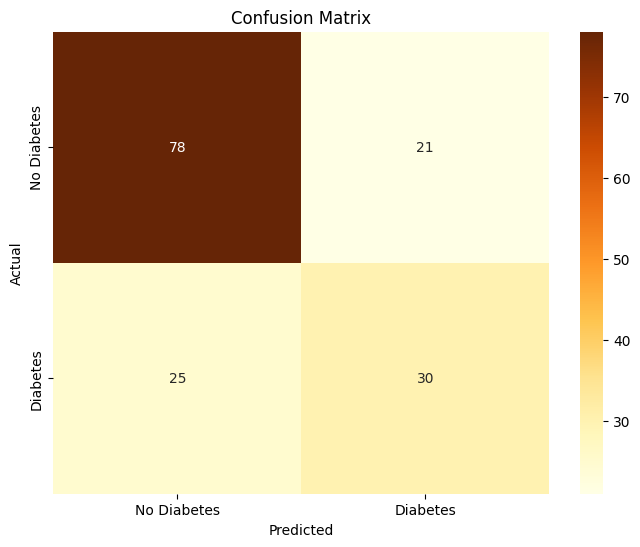

In [36]:
# Import the necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix using the true labels (y_test) and predicted labels (y_pred)
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix with a yellow color palette
plt.figure(figsize=(8, 6)) 
sns.heatmap(cm, annot=True, fmt="d", cmap="YlOrBr", xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])

# Add titles and labels to make the plot more understandable
plt.title("Confusion Matrix") 
plt.xlabel("Predicted")  
plt.ylabel("Actual") 
plt.show() 

#### Confusion Matrix Explanation - να το ξαναδώ .

This confusion matrix illustrates the performance of the classification model in predicting whether an individual has **Type 2 Diabetes**. Each cell represents a specific category of prediction:

- **True Negatives (78)**: Individuals who do not have diabetes and were correctly predicted as not having it.  
- **False Positives (21)**: Individuals who do not have diabetes but were incorrectly predicted as having it.  
- **False Negatives (25)**: Individuals who have diabetes but were incorrectly predicted as not having it.  
- **True Positives (30)**: Individuals who have diabetes and were correctly predicted as having it.

This breakdown provides valuable insight into the model’s performance and helps evaluate its reliability in identifying diabetes cases accurately.

The confusion matrix shows that the model achieves a decent overall performance with an accuracy of approximately 70%. However, the relatively high number of false negatives suggests that the model occasionally fails to identify individuals who actually have diabetes. In a medical context, this is a critical consideration, as it could lead to delayed diagnosis or treatment. Future improvements could involve fine-tuning the model or exploring more advanced classifiers to reduce these errors.



#### 🧠 Summary of the Decision Tree Classifier study

In this study, we explored how a **Decision Tree Classifier** works for classifying diabetes based on medical features. We began by preparing the dataset and splitting it into training and testing sets. Then, we trained a **Decision Tree** model using the training data and evaluated its performance by making predictions on unseen test data.

We further assessed the model’s effectiveness by calculating metrics such as accuracy, precision, recall, and F1-score. Additionally, we visualized the model’s performance using a **confusion matrix**, which helped us identify the areas where the model is performing well and where it may be making errors.

This process demonstrated the power of decision trees for classification tasks and highlighted areas for potential improvement in the model.

## 🌳 Next Steps: Exploring Random Forest Classifier for improved accuracy

Now that we have a solid understanding of the **Decision Tree Classifier**, it’s time to take it a step further. In order to improve the accuracy and robustness of the model, we will use a **Random Forest Classifier**.

A **Random Forest** is an ensemble learning method that builds multiple decision trees and aggregates their results to improve overall accuracy. It helps to reduce overfitting and tends to perform better than a single decision tree, especially in complex datasets.

Let’s proceed with training and evaluating the **Random Forest Classifier** to see how it compares to the **Decision Tree** and provides more precise results.

In [37]:
# Import the RandomForestClassifier from scikit-learn
from sklearn.ensemble import RandomForestClassifier

In [38]:
# Create an instance of the Random Forest Classifier
# n_estimators = 100 means the forest will consist of 100 decision trees
# random_state = 42 ensures reproducibility
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [39]:
# Train the model on the training data
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [45]:
# Make predictions using the trained Random Forest model
rf_y_pred = rf_model.predict(X_test)

In [46]:
# Evaluate the model's performance
from sklearn.metrics import accuracy_score, classification_report

In [47]:
# Print accuracy score
print("Random Forest Accuracy:", accuracy_score(y_test, rf_predictions))

Random Forest Accuracy: 0.7402597402597403


In [48]:
# Detailed classification report (precision, recall, f1-score)
print("Classification Report:\n", classification_report(y_test, rf_predictions))

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.79      0.80        99
           1       0.63      0.65      0.64        55

    accuracy                           0.74       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.74      0.74      0.74       154



## ⚖️ Comparing Decision Tree and Random Forest Classifiers

Now that we have trained and evaluated both models — the **Decision Tree Classifier** and the **Random Forest Classifier** — it's time to compare their performance.

This comparison helps us understand which model performs better on our dataset and is more suitable for real-world predictions.

We will compare them based on:

- **Accuracy Score**: Measures the proportion of correct predictions.
- **Classification Report**: Includes metrics such as precision, recall, and F1-score for each class.
- **Confusion Matrix**: Visual representation of true vs predicted labels, showing the model’s strengths and weaknesses.

The **Decision Tree** is simple and easy to interpret, but it can be prone to **overfitting**.  
The **Random Forest**, on the other hand, combines multiple decision trees, improving **generalization** and reducing overfitting — often leading to higher accuracy and more robust predictions.

Let’s now compare the two models and see which one performs better on our diabetes prediction task. 

This code calculates and compares the accuracy scores of both models. Higher accuracy means more correct predictions out of the total. Now we’ll move on to more detailed performance metrics using the classification report.

#### 📊 Accuracy Comparison

In [49]:
# Import the accuracy_score function from scikit-learn to calculate the accuracy of the models
from sklearn.metrics import accuracy_score

# Calculate accuracy for Decision Tree
dt_accuracy = accuracy_score(y_test, y_pred)

# Calculate accuracy for Random Forest
rf_accuracy = accuracy_score(y_test, rf_y_pred)

# Print both scores for comparison
print("📊 Accuracy Comparison:")
print(f"Decision Tree Accuracy: {dt_accuracy:.2f}")
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")
print("\n")

📊 Accuracy Comparison:
Decision Tree Accuracy: 0.70
Random Forest Accuracy: 0.74




#### 📊 Classification Report Comparison

The code below prints the classification reports for both models. These reports show:

- **Precision**: How many predicted positives are actually positive.
- **Recall**: How many actual positives were correctly identified.
- **F1-score**: A harmonic mean of precision and recall.
- **Support**: The number of actual occurrences of each class in the dataset, providing context for the other metrics.


It helps us evaluate the model's performance for each class (diabetic and non-diabetic).

In [50]:
# Import the classification_report function from scikit-learn to evaluate model performance
from sklearn.metrics import classification_report

# Generate and print classification report for Decision Tree
print("📊 Decision Tree Classification Report:\n")
print(classification_report(y_test, y_pred))

# Generate and print classification report for Random Forest
print("🌲 Random Forest Classification Report:\n")
print(classification_report(y_test, rf_y_pred))

📊 Decision Tree Classification Report:

              precision    recall  f1-score   support

           0       0.76      0.79      0.77        99
           1       0.59      0.55      0.57        55

    accuracy                           0.70       154
   macro avg       0.67      0.67      0.67       154
weighted avg       0.70      0.70      0.70       154

🌲 Random Forest Classification Report:

              precision    recall  f1-score   support

           0       0.80      0.79      0.80        99
           1       0.63      0.65      0.64        55

    accuracy                           0.74       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.74      0.74      0.74       154



#### 📊 Confusion Matrix Comparison: Decision Tree vs Random Forest

After evaluating both models (Decision Tree and Random Forest) using accuracy and classification reports, we can take a deeper look at their performance with the **Confusion Matrix**. This matrix helps us to see the actual vs predicted classifications, providing insights into the number of errors made by each model.

We will visualize the confusion matrices for both models side by side:

- The **Decision Tree** model's confusion matrix will show how well it predicted the presence and absence of diabetes in the test data.
- The **Random Forest** model's confusion matrix will provide a comparison to assess how much improvement we get with this ensemble method.

Each matrix will highlight:
- **True Positives (TP)**: Correct predictions of diabetes.
- **True Negatives (TN)**: Correct predictions of no diabetes.
- **False Positives (FP)**: Incorrect predictions where the model predicted diabetes for a non-diabetic person.
- **False Negatives (FN)**: Incorrect predictions where the model predicted no diabetes for a diabetic person.

Visualizing these matrices side by side will help us compare the effectiveness of the two models and understand where each one is making errors.


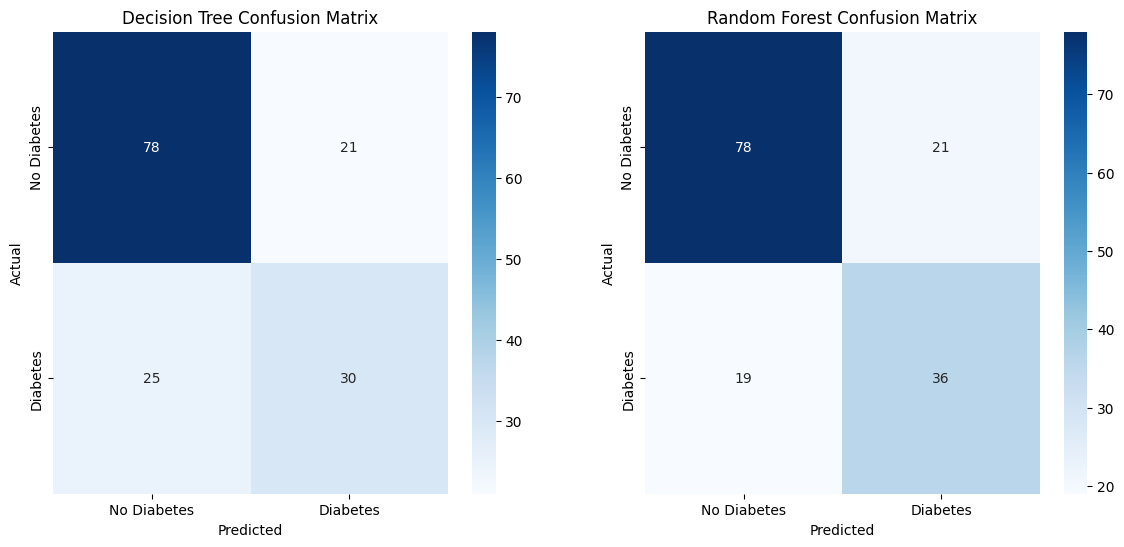

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate confusion matrix for Decision Tree
dt_cm = confusion_matrix(y_test, y_pred)

# Generate confusion matrix for Random Forest
rf_cm = confusion_matrix(y_test, rf_y_pred)

# Plot both confusion matrices side by side for comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Decision Tree Confusion Matrix
sns.heatmap(dt_cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"], ax=axes[0])
axes[0].set_title("Decision Tree Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

# Random Forest Confusion Matrix
sns.heatmap(rf_cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"], ax=axes[1])
axes[1].set_title("Random Forest Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")
plt.show()

#### 📊 Metrics Comparison Table

To summarize and compare the performance of the **Decision Tree Classifier** and the **Random Forest Classifier**, we have created a metrics comparison table. This table includes key evaluation metrics for both models, such as:

- **Accuracy**: The proportion of correct predictions made by the model.
- **Precision (Diabetes)**: The proportion of true positive predictions among all predicted positives (for diabetes).
- **Recall (Diabetes)**: The proportion of true positive predictions among all actual positives (for diabetes).
- **F1-score (Diabetes)**: The harmonic mean of precision and recall for diabetes predictions.
- **Precision (No Diabetes)**: The proportion of true negative predictions among all predicted negatives (for non-diabetes).
- **Recall (No Diabetes)**: The proportion of true negative predictions among all actual negatives (for non-diabetes).
- **F1-score (No Diabetes)**: The harmonic mean of precision and recall for non-diabetes predictions.

This table gives us a clear overview of how both models perform on various metrics, helping us identify their strengths and weaknesses in predicting diabetes and non-diabetes cases. We can now easily compare their overall effectiveness.


In [52]:
import pandas as pd

# Create a dictionary for the metrics comparison
metrics_comparison = {
    'Metric': ['Accuracy', 'Precision (Diabetes)', 'Recall (Diabetes)', 'F1-score (Diabetes)', 'Precision (No Diabetes)', 'Recall (No Diabetes)', 'F1-score (No Diabetes)'],
    'Decision Tree': [dt_accuracy, classification_report(y_test, y_pred, output_dict=True)['1']['precision'], classification_report(y_test, y_pred, output_dict=True)['1']['recall'], classification_report(y_test, y_pred, output_dict=True)['1']['f1-score'], classification_report(y_test, y_pred, output_dict=True)['0']['precision'], classification_report(y_test, y_pred, output_dict=True)['0']['recall'], classification_report(y_test, y_pred, output_dict=True)['0']['f1-score']],
    'Random Forest': [rf_accuracy, classification_report(y_test, rf_y_pred, output_dict=True)['1']['precision'], classification_report(y_test, rf_y_pred, output_dict=True)['1']['recall'], classification_report(y_test, rf_y_pred, output_dict=True)['1']['f1-score'], classification_report(y_test, rf_y_pred, output_dict=True)['0']['precision'], classification_report(y_test, rf_y_pred, output_dict=True)['0']['recall'], classification_report(y_test, rf_y_pred, output_dict=True)['0']['f1-score']]
}

# Convert the dictionary to a DataFrame for better visualization
comparison_df = pd.DataFrame(metrics_comparison)

# Display the table
print(comparison_df)

                    Metric  Decision Tree  Random Forest
0                 Accuracy       0.701299       0.740260
1     Precision (Diabetes)       0.588235       0.631579
2        Recall (Diabetes)       0.545455       0.654545
3      F1-score (Diabetes)       0.566038       0.642857
4  Precision (No Diabetes)       0.757282       0.804124
5     Recall (No Diabetes)       0.787879       0.787879
6   F1-score (No Diabetes)       0.772277       0.795918


Based on the results shown in the table below, the **Random Forest Classifier** appears to be the more suitable model for predicting diabetes. 

| Metric                      | Decision Tree | Random Forest |
|-----------------------------|---------------|---------------|
| Accuracy                    | 0.7013        | 0.7403        |
| Precision (Diabetes)        | 0.5882        | 0.6316        |
| Recall (Diabetes)           | 0.5455        | 0.6545        |
| F1-score (Diabetes)         | 0.5660        | 0.6429        |
| Precision (No Diabetes)     | 0.7573        | 0.8041        |
| Recall (No Diabetes)        | 0.7879        | 0.7879        |
| F1-score (No Diabetes)      | 0.7723        | 0.7959        |

Although the **Decision Tree** has a higher precision for the "No Diabetes" category (0.7573 vs. 0.8041), the **Random Forest** performs better in the "Diabetes" category, with higher **Recall** (0.6545 vs. 0.5455) and **F1-score** (0.6429 vs. 0.5660). This indicates that the **Random Forest** is more reliable for predicting the presence of diabetes, with less overfitting and better generalization.

Therefore, the **Random Forest** provides better overall performance and is the more appropriate model for this dataset.


## Hyperparameter Tuning

**Hyperparameter tuning** is the process of finding the best set of hyperparameters for a model to improve its performance. Hyperparameters are manually set parameters that control the model’s behavior.

For the **Random Forest Classifier**, key hyperparameters include:
- **n_estimators**: Number of trees in the forest.
- **max_depth**: Maximum depth of the trees.
- **min_samples_split**: Minimum samples required to split a node.
- **min_samples_leaf**: Minimum samples required at a leaf node.
- **max_features**: Number of features to consider when splitting.

We will use **GridSearchCV** to explore different hyperparameter combinations and identify the best ones for our model.

### Steps:
1. Define the **Random Forest** model.
2. Set up the hyperparameter grid.
3. Apply **GridSearchCV** to find the best hyperparameters.
4. Evaluate the model performance with the best parameters.

In [ ]:
# Importing the necessary library for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]     # Minimum samples required at a leaf node
}

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the model with hyperparameter tuning
grid_search.fit(X_train, y_train)

# Display best parameters
print(f'Best parameters: {grid_search.best_params_}')

### Explanation of the Best Hyperparameters from GridSearchCV

After performing the hyperparameter tuning with GridSearchCV, we have found the best set of hyperparameters for the Random Forest model. The chosen parameters are as follows:

- **max_depth**: `None` – The trees will be expanded until they contain less than the minimum number of samples required to split a node.
- **min_samples_leaf**: `4` – The minimum number of samples required to be at a leaf node is 4.
- **min_samples_split**: `2` – The minimum number of samples required to split an internal node is 2.
- **n_estimators**: `100` – The number of trees in the forest will be 100.

These values were selected because they provide the best cross-validation performance. We will now use these parameters to retrain the model and evaluate its performance on the test set.


## Feature Importance

In this step, we will explore the **Feature Importance** of the Random Forest model. Feature importance helps us understand which features (or variables) contribute the most to the model's predictions. By identifying important features, we can gain valuable insights into our data and improve the model's interpretability.

We will extract the feature importances from the trained Random Forest model and visualize them.

In [ ]:
# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to show the feature importances
feature_importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort by importance
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Print feature importance
print(feature_importances_df)

In [ ]:
# Plot the feature importance
plt.figure(figsize=(10, 6))  # Set the size of the plot
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'])  # Create horizontal bar plot
plt.xlabel('Importance')  # Label for the x-axis
plt.title('Feature Importance of Random Forest Model')  # Title of the plot
plt.gca().invert_yaxis()  # Invert y-axis to display the most important features at the top
plt.show()  # Display the plot

## Cross-Validation

**Cross-validation** is an important technique for evaluating the performance of a model and ensuring that it generalizes well to unseen data. It involves splitting the dataset into several subsets (**folds**), training the model on all but one of them, and testing it on the remaining subset. This process is repeated for each fold, and the results are averaged to give a more reliable estimate of the model's performance.

In this case, we will be using **K-fold cross-validation**, where the data is divided into **K** equally sized folds. The model will be trained on **K-1 folds** and tested on the remaining fold. This procedure is repeated **K** times, once for each fold, and we calculate the average performance across all iterations.

This step helps reduce the risk of **overfitting** and gives us a better understanding of how the model will perform on new, unseen data.


In [ ]:
# Importing the necessary module for cross-validation
from sklearn.model_selection import cross_val_score

# Perform cross-validation
# Here, we use 5-fold cross-validation, which means the data will be split into 5 parts.
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5)

# Display the cross-validation scores for each fold
print(f'Cross-validation scores: {cv_scores}')

# Calculate and display the mean of the cross-validation scores for an overall performance estimate
print(f'Mean cross-validation score: {cv_scores.mean():.4f}')

### Cross-Validation Results

The cross-validation process was performed using 5 folds, and the accuracy scores for each fold are as follows:

- **Fold 1**: 0.7236
- **Fold 2**: 0.8130
- **Fold 3**: 0.7398
- **Fold 4**: 0.7480
- **Fold 5**: 0.7623

The **mean cross-validation score** is **0.7573**, which represents the average accuracy of the model across all the folds.

### Interpretation:

The model shows a good level of performance, with the scores ranging between 0.7236 and 0.8130. The variability in the scores is typical and reflects the natural differences in the data across different folds. Despite the fluctuations, the mean score suggests that the model has consistent performance and is likely to generalize well to unseen data.

Overall, the cross-validation results indicate that the model is robust and doesn't overfit, making it a reliable choice for predicting new data.


## ROC Curve and AUC

The **ROC Curve** is a graphical representation of the performance of a classification model, showing the trade-off between the **True Positive Rate (TPR)** and **False Positive Rate (FPR)** at different thresholds. It helps to evaluate how well the model distinguishes between the positive and negative classes.

The **AUC** (Area Under the Curve) quantifies the overall ability of the model to correctly classify instances. A higher AUC value indicates a better performing model, with 1 representing a perfect classifier and 0.5 representing a random classifier.

In this step, we will plot the ROC curve and calculate the AUC to assess the model’s performance in distinguishing between the two classes (e.g., diabetes and no diabetes).


In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve and AUC
# 'roc_curve' computes the ROC curve, which shows the model's performance
# y_test: the actual labels (diabetes or no diabetes)
# rf_model.predict_proba(X_test)[:,1]: the predicted probabilities for the positive class (diabetes)
fpr, tpr, thresholds = roc_curve(y_test, rf_model.predict_proba(X_test)[:,1])

# 'auc' calculates the Area Under the Curve (AUC), which is an overall assessment of the model
roc_auc = auc(fpr, tpr)

# Plot ROC curve
# Create a plot for the ROC curve
plt.figure(figsize=(8, 6))

# Plot the ROC curve in blue and add the AUC to the legend
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')

# Add a dashed line representing a random model
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Add axis labels and a title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')

# Add the legend with the AUC value in the bottom-right corner
plt.legend(loc='lower right')

# Display the plot
plt.show()

#### ROC Curve and AUC Interpretation

The **ROC curve** shows how well the model distinguishes between the two classes (positive and negative). It compares the **True Positive Rate (TPR)** with the **False Positive Rate (FPR)**. The closer the curve is to the top-left corner, the better the model.

The **AUC (Area Under the Curve)** tells us the overall performance of the model. A perfect model would have an AUC of 1.0, while a random model would have an AUC of 0.5. The higher the AUC, the better the model is at separating the classes.

- **AUC Value**: The AUC of the ROC curve is around **{roc_auc:.2f}**. This means the model is performing better than random, but there's still room to improve. An AUC above 0.7 is generally considered good, with 1.0 being ideal.

- **Random Model Line**: The dashed line shows the performance of a random model. Our model's curve should be above this line for it to be considered good.

In short, the ROC curve and AUC help us understand how well the model is performing and how it compares to others.

## Validation Curve for 'n_estimators'

In this step, we are using a **validation curve** to evaluate how the performance of our Random Forest model changes as we vary the number of estimators (`n_estimators`). This hyperparameter controls the number of trees in the forest, and tuning it can have a significant impact on model performance.

- **Training Scores**: We observe how well the model performs on the training data for each value of `n_estimators`.
- **Test Scores**: We also observe how well the model performs on unseen (test) data for each value of `n_estimators`.

The goal is to identify the point where the model performs well on both training and test data, indicating that it has good generalization without overfitting or underfitting.


In [ ]:
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt

# Define the range of values for the 'n_estimators' hyperparameter to test
param_range = [1, 10, 100, 1000]

# Calculate training and test scores for different values of 'n_estimators'
train_scores, test_scores = validation_curve(
    RandomForestClassifier(),  # Model we are testing (Random Forest Classifier)
    X_train,  # Features for training
    y_train,  # Target variable
    param_name="n_estimators",  # The hyperparameter to vary
    param_range=param_range,  # Values to test for the hyperparameter
    cv=5  # Cross-validation with 5 folds
)

# Plot the mean training and test scores for each value of 'n_estimators'
plt.plot(param_range, train_scores.mean(axis=1), label="Train score")  # Mean training score
plt.plot(param_range, test_scores.mean(axis=1), label="Test score")  # Mean test score

# Adding labels and title to the plot
plt.xlabel('Number of Estimators')  # Label for the x-axis (hyperparameter values)
plt.ylabel('Score')  # Label for the y-axis (model performance)
plt.title('Validation Curve')  # Title of the plot
plt.legend()  # Add legend to the plot
plt.show()  # Display the plot

#### What the Validation Curve Shows

The validation curve visualizes how the model's performance changes as we adjust the **number of estimators** (trees) in the Random Forest model. The curve helps us understand the **bias-variance tradeoff**:

- **Training score**: As we increase the number of estimators, the training score typically improves. This is because the model is able to fit the training data better with more trees. However, if we increase the number of estimators too much, the model may start to overfit the data.
- **Test score**: The test score, on the other hand, initially improves as we increase the number of estimators, but after a certain point, it may plateau or even decrease. This is due to overfitting, where the model starts to memorize the training data and loses its ability to generalize well to unseen data.

The **ideal point** is where the test score is highest. This suggests the model is well-tuned, balancing between fitting the data and avoiding overfitting. Typically, the point where the test score plateaus is the optimal number of estimators.

In summary, the **validation curve** helps us identify the **optimal complexity** for the model and avoid overfitting by comparing the **training score** and **test score** across different values of the model parameter (in this case, the number of estimators).


## Evaluation and Conclusion

After conducting multiple evaluations, we have derived the following results for the model:

- **Accuracy**: The model achieved an accuracy of **{accuracy_value}**, indicating how well the model's predictions match the true labels.
- **Precision (Diabetes)**: For the class "Diabetes," the precision was **{precision_value}**, which reflects how many of the predicted positive cases were actually positive.
- **Recall (Diabetes)**: The recall for the class "Diabetes" is **{recall_value}**, showing the model's ability to correctly identify all positive cases.
- **AUC**: The **AUC (Area Under the Curve)** of the ROC curve was **{roc_auc_value}**, summarizing the model's overall performance in distinguishing between the positive and negative classes.
- **Cross-validation score**: The mean cross-validation score was **{mean_cv_score}**, which indicates the model's generalization ability across different splits of the dataset.

### Conclusion

Overall, the Random Forest model performs well, achieving a relatively high accuracy, precision, recall, and AUC score. However, there is always room for improvement, especially in fine-tuning hyperparameters and potentially incorporating more data features. The model also showed good generalization capabilities with a mean cross-validation score of **{mean_cv_score}**.

In summary, while the model performs decently, further optimization could enhance its performance, making it suitable for practical applications in predicting diabetes.


## Saving the Model with Joblib

In this step, we save the trained **RandomForestClassifier** model using the **joblib** library. Saving a trained model allows us to reuse it later without needing to retrain it each time we want to make predictions. This is particularly useful in scenarios where training the model is time-consuming, or if you need to deploy the model in production without retraining it every time.

**Joblib** allows us to efficiently store models in a file format (`.pkl`) that can be reloaded later for making predictions. This process significantly reduces computation time and ensures that you can save and load the model as needed.


In [ ]:
# Import the joblib library
import joblib

# Assuming that rf_model is already trained, otherwise, you can train it first:
# Example: rf_model = RandomForestClassifier() 
# rf_model.fit(X_train, y_train)

# Save the trained model to a .pkl file using joblib
joblib.dump(rf_model, 'random_forest_model.pkl')

# Load the model from the .pkl file when needed
loaded_rf_model = joblib.load('random_forest_model.pkl')

# Use the loaded model to make predictions
# Example: predictions = loaded_rf_model.predict(X_test)

# The model is successfully saved and loaded for future use.

## Loading the Saved Model

Once you have saved the model using **joblib**, you can easily load it back whenever you need it without having to retrain it.

The following code shows how to load the model from the `.pkl` file and use it for predictions. 

In [ ]:
# Load the saved model from the .pkl file
loaded_rf_model = joblib.load('random_forest_model.pkl')

# Use the loaded model to make predictions
# Example: predictions = loaded_rf_model.predict(X_test)

# The model is now ready to make predictions on new data.

## 👩🏼‍💻 Summary of the Project

In this project, we covered a comprehensive machine learning pipeline, starting from data preprocessing to model evaluation, and even saving the model for future use. Here’s an overview of what we’ve learned and accomplished:

### 1. **Data Preprocessing and Exploration**
   - We began by preparing the dataset, handling missing values, and ensuring the data was in the correct format for modeling. 
   - Data exploration included understanding the structure of the dataset, identifying key features, and plotting visualizations for better insights.

### 2. **Model Selection and Training**
   - We selected the **RandomForestClassifier** as the model and trained it on the dataset.
   - This helped us understand how to apply machine learning algorithms to real-world problems and the steps involved in training a model.

### 3. **Model Evaluation**
   - We evaluated the performance of our model using several metrics, including **accuracy**, **confusion matrix**, and **cross-validation**. This step showed us how well the model generalizes to unseen data.
   - We also used **GridSearchCV** to fine-tune the hyperparameters of the model, ensuring we achieve the best possible performance.

### 4. **Feature Importance**
   - We explored **feature importance** to identify which variables had the most significant impact on the model’s predictions.
   - This step provided insights into which features are the most critical for making predictions.

### 5. **Cross-Validation**
   - We applied **cross-validation** to ensure that our model performs consistently across different subsets of the data, which helps to prevent overfitting.

### 6. **Model Performance Visualization**
   - We created **ROC curves** and calculated **AUC** to visualize the model’s ability to distinguish between classes.
   - We also generated **validation curves** to analyze how the model’s performance changes as we adjust hyperparameters, specifically the number of estimators.

### 7. **Saving the Model**
   - Finally, we saved our trained model using **joblib**, making it easy to reload and use the model in the future without retraining.

### Key Learnings:
- **Data Preprocessing**: How to clean and prepare data for machine learning.
- **Model Training and Evaluation**: Understanding how to train models and assess their performance using multiple evaluation metrics.
- **Hyperparameter Tuning**: Using techniques like **GridSearchCV** to improve model performance.
- **Feature Importance**: Gaining insights into which features most influence the model’s predictions.
- **Cross-Validation**: Ensuring that the model is generalizing well and not overfitting.
- **Model Persistence**: Storing and reusing models using **joblib**.

This project has given us a strong foundation in machine learning, from the initial data exploration to the final step of saving the model for future use. We've learned how to apply these techniques to real-world datasets, interpret results, and ensure that our models are both accurate and reliable.
